In [1]:
import pandas as pd

df = pd.read_csv('data/loan_data_sample.csv', index_col='SK_ID_CURR')
df.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_EDUCATION_TYPE
SK_ID_CURR,,,,,,,,,,,
100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Secondary / secondary special
100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Higher education
100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Secondary / secondary special
100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Secondary / secondary special
100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Secondary / secondary special


In [2]:
numeric_df = df.copy()
numeric_df['NAME_CONTRACT_TYPE'] = numeric_df['NAME_CONTRACT_TYPE'].map({'Cash loans': 0, 'Revolving loans': 1})
numeric_df['CODE_GENDER'] = numeric_df['CODE_GENDER'].map({'M': 0, 'F': 1})
numeric_df['FLAG_OWN_CAR'] = numeric_df['FLAG_OWN_CAR'].map({'N': 0, 'Y': 1})
numeric_df['FLAG_OWN_REALTY'] = numeric_df['FLAG_OWN_REALTY'].map({'N': 0, 'Y': 1})
numeric_df['NAME_EDUCATION_TYPE'] = numeric_df['NAME_EDUCATION_TYPE'].map({'Lower secondary': 0,
                                                                           'Secondary / secondary special': 0,
                                                                           'Incomplete higher': 1,
                                                                           'Higher education': 2,
                                                                           'Academic degree': 2})
numeric_df.dropna(inplace=True)

In [3]:
numeric_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307217 entries, 100002 to 456255
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   TARGET               307217 non-null  int64  
 1   NAME_CONTRACT_TYPE   307217 non-null  int64  
 2   CODE_GENDER          307217 non-null  float64
 3   FLAG_OWN_CAR         307217 non-null  int64  
 4   FLAG_OWN_REALTY      307217 non-null  int64  
 5   CNT_CHILDREN         307217 non-null  int64  
 6   AMT_INCOME_TOTAL     307217 non-null  float64
 7   AMT_CREDIT           307217 non-null  float64
 8   AMT_ANNUITY          307217 non-null  float64
 9   AMT_GOODS_PRICE      307217 non-null  float64
 10  NAME_EDUCATION_TYPE  307217 non-null  int64  
dtypes: float64(5), int64(6)
memory usage: 28.1 MB


<AxesSubplot:ylabel='Frequency'>

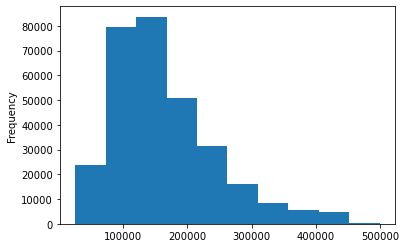

In [4]:
numeric_df[numeric_df['AMT_INCOME_TOTAL'] < 500000]['AMT_INCOME_TOTAL'].plot.hist()

<AxesSubplot:xlabel='AMT_INCOME_TOTAL', ylabel='Density'>

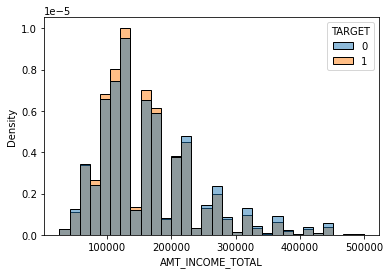

In [5]:
import seaborn as sns

sns.histplot(numeric_df[numeric_df['AMT_INCOME_TOTAL'] < 500000],
             x='AMT_INCOME_TOTAL',
             hue='TARGET',
             common_norm=False,
             stat='density',
             bins=30)

Fractions of data in the split nodes from example 1

In [6]:
print(numeric_df['TARGET'].value_counts())
print(numeric_df['TARGET'].value_counts(normalize=True))

0    282413
1     24804
Name: TARGET, dtype: int64
0    0.919262
1    0.080738
Name: TARGET, dtype: float64


In [7]:
print(numeric_df[numeric_df['AMT_INCOME_TOTAL'] < 200000]['TARGET'].value_counts())
print(numeric_df[numeric_df['AMT_INCOME_TOTAL'] < 200000]['TARGET'].value_counts(normalize=True))

0    200816
1     18532
Name: TARGET, dtype: int64
0    0.915513
1    0.084487
Name: TARGET, dtype: float64


In [8]:
print(numeric_df[numeric_df['AMT_INCOME_TOTAL'] >= 200000]['TARGET'].value_counts())
print(numeric_df[numeric_df['AMT_INCOME_TOTAL'] >= 200000]['TARGET'].value_counts(normalize=True))

0    81597
1     6272
Name: TARGET, dtype: int64
0    0.928621
1    0.071379
Name: TARGET, dtype: float64


Gini calculations for the split nodes from the example in figure 1.

In [9]:
1 - 0.92 ** 2 - 0.08 ** 2

0.14719999999999997

In [10]:
1 - 0.93 ** 2 - 0.07 ** 2

0.1301999999999999

## Fitting a decision tree

In [11]:
from sklearn.model_selection import train_test_split

features = numeric_df.drop('TARGET', axis=1)
targets = numeric_df['TARGET']

x_train, x_test, y_train, y_test = train_test_split(features, targets, stratify=targets, random_state=42)

In [12]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
print(f'Train accuracy: {dt.score(x_train, y_train)}')
print(f'Test accuracy: {dt.score(x_test, y_test)}')

Train accuracy: 0.9835772442407513
Test accuracy: 0.8571447171408112


In [13]:
dt.get_depth()

50

In [14]:
small_dt = DecisionTreeClassifier(max_depth=2, max_features=None)
small_dt.fit(x_train, y_train)
print(f'Train accuracy: {small_dt.score(x_train, y_train)}')
print(f'Test accuracy: {small_dt.score(x_test, y_test)}')

Train accuracy: 0.9192620176032499
Test accuracy: 0.9192630688106244


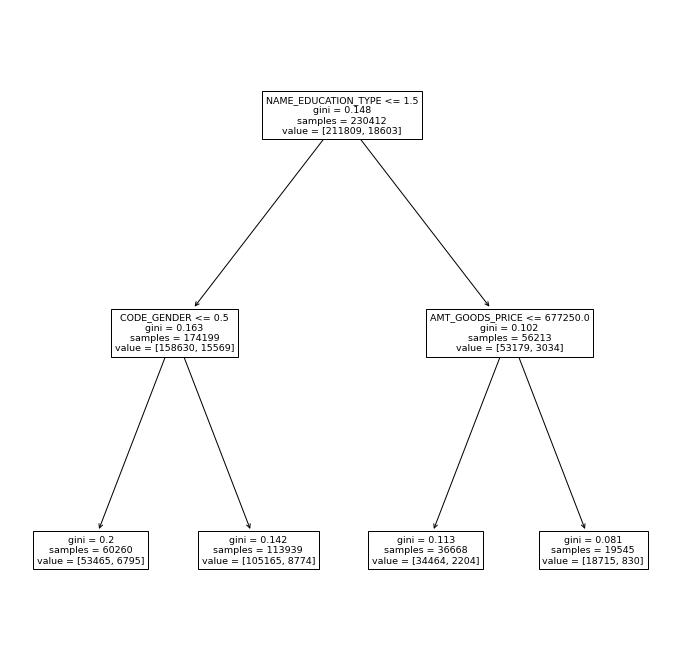

In [15]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

f = plt.figure(figsize=(12, 12))
_ = plot_tree(small_dt, feature_names=features.columns)

# Random forests

## sklearn

In [16]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(max_depth=10, n_jobs=-1, random_state=42)
rfc.fit(x_train, y_train)
print(rfc.score(x_train, y_train))
print(rfc.score(x_test, y_test))

0.9192880579136503
0.9192630688106244


In [17]:
features.shape

(307217, 10)

In [18]:
from sklearn.model_selection import GridSearchCV

x_tr_sample = x_train.sample(1000)
y_tr_sample = y_train.loc[x_tr_sample.index]

params = {'n_estimators': [100, 300, 500],
         'max_depth': [10, 15, 20],
         'max_features': [3, 6, 9],
         'random_state': [42],
         'n_jobs': [-1]}
gs = GridSearchCV(RandomForestClassifier(), param_grid=params)
gs.fit(x_tr_sample, y_tr_sample)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 15, 20], 'max_features': [3, 6, 9],
                         'n_estimators': [100, 300, 500], 'n_jobs': [-1],
                         'random_state': [42]})

In [19]:
gs.best_estimator_

RandomForestClassifier(max_depth=10, max_features=3, n_jobs=-1, random_state=42)

In [20]:
gs.best_score_

0.909

## H2O random forests

In [21]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.301-b09, mixed mode)
  Starting server from C:\Users\words\anaconda3\envs\datasci\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\words\AppData\Local\Temp\tmpbjklx_2_
  JVM stdout: C:\Users\words\AppData\Local\Temp\tmpbjklx_2_\h2o_words_started_from_python.out
  JVM stderr: C:\Users\words\AppData\Local\Temp\tmpbjklx_2_\h2o_words_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,01 secs
H2O_cluster_timezone:,Europe/Berlin
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.1.4
H2O_cluster_version_age:,1 month and 21 days
H2O_cluster_name:,H2O_from_python_words_zuze5x
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,7.085 Gb
H2O_cluster_total_cores:,16
H2O_cluster_allowed_cores:,16
H2O_cluster_status:,"accepting new members, healthy"


In [22]:
hf = h2o.H2OFrame(df)
hf['TARGET'] = hf['TARGET'].asfactor()
train, valid = hf.split_frame(ratios=[.8], seed=42)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [23]:
hf.columns

['TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_EDUCATION_TYPE']

In [24]:
from h2o.estimators import H2ORandomForestEstimator

drf = H2ORandomForestEstimator(ntrees=100, max_depth=10, mtries=3)
feature_columns = hf.columns
feature_columns.remove('TARGET')
target_column = 'TARGET'
drf.train(x=feature_columns, y=target_column, training_frame=train, validation_frame=valid)

drf Model Build progress: |███████████████████████████████████████████████| 100%


In [25]:
drf

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_model_python_1630259304654_1


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,100.0,100.0,723908.0,10.0,10.0,10.0,471.0,706.0,571.25




ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.07236836002640758
RMSE: 0.26901367999863424
LogLoss: 0.27006790635377526
Mean Per-Class Error: 0.39574396833816194
AUC: 0.643060222237827
AUCPR: 0.13894887897491262
Gini: 0.286120444475654

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.10403307053811124: 


,,0,1,Error,Rate
0,0,182296.0,44076.0,0.1947,(44076.0/226372.0)
1,1,12298.0,7504.0,0.621,(12298.0/19802.0)
2,Total,194594.0,51580.0,0.229,(56374.0/246174.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.104033,0.210249,173.0
1,max f2,0.069745,0.333892,262.0
2,max f0point5,0.134962,0.182998,116.0
3,max accuracy,0.463555,0.919557,0.0
4,max precision,0.248713,0.271429,15.0
5,max recall,0.002777,1.000000,397.0
6,max specificity,0.463555,0.999996,0.0
7,max absolute_mcc,0.097626,0.123272,187.0
8,max min_per_class_accuracy,0.078637,0.602060,234.0
9,max mean_per_class_accuracy,0.086120,0.604256,213.0



Gains/Lift Table: Avg response rate:  8.04 %, avg score:  8.06 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010001,0.184551,3.044825,3.044825,0.244923,0.203899,0.244923,0.203899,0.030451,0.030451,204.482537,204.482537,0.022239
1,2,0.020002,0.171688,2.443939,2.744382,0.196588,0.177409,0.220755,0.190654,0.024442,0.054893,144.393944,174.438240,0.037943
2,3,0.030003,0.164170,2.322752,2.603839,0.186840,0.167704,0.209450,0.183004,0.023230,0.078123,132.275236,160.383905,0.052330
3,4,0.040000,0.158021,2.273181,2.521200,0.182852,0.161132,0.202803,0.177538,0.022725,0.100848,127.318105,152.119974,0.066171
4,5,0.050001,0.152339,2.140972,2.445148,0.172218,0.155156,0.196685,0.173061,0.021412,0.122260,114.097174,144.514796,0.078580
5,6,0.100002,0.130320,1.898752,2.171950,0.152734,0.140601,0.174710,0.156831,0.094940,0.217200,89.875182,117.194989,0.127450
6,7,0.150000,0.115880,1.570638,1.971523,0.126341,0.122497,0.158587,0.145387,0.078527,0.295728,57.063775,97.152337,0.158476
7,8,0.200001,0.105532,1.391745,1.826576,0.111951,0.110512,0.146928,0.136668,0.069589,0.365317,39.174469,82.657575,0.179777
8,9,0.299999,0.090492,1.215049,1.622736,0.097737,0.097497,0.130531,0.123611,0.121503,0.486820,21.504853,62.273611,0.203163
9,10,0.400002,0.079455,1.026639,1.473709,0.082582,0.084670,0.118544,0.113876,0.102666,0.589486,2.663895,47.370879,0.206060




ModelMetricsBinomial: drf
** Reported on validation data. **

MSE: 0.07346864797998254
RMSE: 0.271051006233112
LogLoss: 0.2731711831951146
Mean Per-Class Error: 0.388792117045764
AUC: 0.646725108893026
AUCPR: 0.14486094484918113
Gini: 0.29345021778605207

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.0948228209897958: 


,,0,1,Error,Rate
0,0,42276.0,14038.0,0.2493,(14038.0/56314.0)
1,1,2718.0,2305.0,0.5411,(2718.0/5023.0)
2,Total,44994.0,16343.0,0.2732,(16756.0/61337.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.094823,0.215763,193.0
1,max f2,0.070512,0.339268,259.0
2,max f0point5,0.151623,0.184808,85.0
3,max accuracy,0.353212,0.918092,0.0
4,max precision,0.231229,0.367347,12.0
5,max recall,0.000719,1.000000,399.0
6,max specificity,0.353212,0.999982,0.0
7,max absolute_mcc,0.088242,0.130681,209.0
8,max min_per_class_accuracy,0.078546,0.606411,234.0
9,max mean_per_class_accuracy,0.087757,0.611208,210.0



Gains/Lift Table: Avg response rate:  8.19 %, avg score:  8.06 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010010,0.184754,3.241743,3.241743,0.265472,0.203390,0.265472,0.203390,0.032451,0.032451,224.174303,224.174303,0.024442
1,2,0.020004,0.171921,2.430293,2.836349,0.199021,0.177351,0.232274,0.190381,0.024288,0.056739,143.029341,183.634888,0.040011
2,3,0.030015,0.163905,2.525775,2.732768,0.206840,0.167445,0.223791,0.182732,0.025284,0.082023,152.577524,173.276810,0.056647
3,4,0.040008,0.158378,2.131487,2.582570,0.174551,0.161081,0.211491,0.177323,0.021302,0.103325,113.148684,158.257030,0.068964
4,5,0.050002,0.151865,2.350612,2.536209,0.192496,0.154908,0.207695,0.172843,0.023492,0.126817,135.061166,153.620882,0.083666
5,6,0.100005,0.129850,1.799633,2.167921,0.147375,0.140227,0.177535,0.156535,0.089986,0.216803,79.963326,116.792104,0.127216
6,7,0.150007,0.115485,1.648337,1.994726,0.134985,0.121972,0.163352,0.145014,0.082421,0.299224,64.833666,99.472625,0.162526
7,8,0.200010,0.105375,1.373614,1.839448,0.112488,0.110089,0.150636,0.136283,0.068684,0.367908,37.361388,83.944816,0.182874
8,9,0.299998,0.090290,1.278267,1.652408,0.104680,0.097225,0.135319,0.123265,0.127812,0.495720,27.826653,65.240794,0.213179
9,10,0.400003,0.079120,1.029215,1.496603,0.084284,0.084436,0.122560,0.113557,0.102927,0.598646,2.921504,49.660337,0.216361




Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2021-08-29 19:48:31,0.103 sec,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,2021-08-29 19:48:31,0.553 sec,1.0,0.271485,0.334493,0.617132,0.121146,2.235208,0.282787,0.273359,0.324610,0.619367,0.123297,2.302174,0.279945
2,,2021-08-29 19:48:32,0.914 sec,2.0,0.271049,0.312107,0.616757,0.119067,2.054633,0.269723,0.272296,0.279904,0.627351,0.127461,2.233992,0.233644
3,,2021-08-29 19:48:32,1.119 sec,3.0,0.270391,0.302199,0.621759,0.123200,2.133920,0.267583,0.271699,0.277018,0.634214,0.134333,2.790572,0.244828
4,,2021-08-29 19:48:32,1.234 sec,4.0,0.270121,0.295286,0.623508,0.123994,2.316875,0.271111,0.271579,0.275163,0.636056,0.135538,2.785017,0.237149
5,,2021-08-29 19:48:32,1.341 sec,5.0,0.269845,0.289729,0.623422,0.124870,2.322679,0.239399,0.271506,0.275051,0.636783,0.136173,2.737679,0.241958
6,,2021-08-29 19:48:32,1.437 sec,6.0,0.269708,0.285794,0.626591,0.126780,2.509535,0.241484,0.271435,0.274888,0.637686,0.137059,2.819503,0.233578
7,,2021-08-29 19:48:32,1.541 sec,7.0,0.269532,0.283829,0.629305,0.127991,2.509582,0.272443,0.271358,0.274207,0.639299,0.138437,2.903647,0.232682
8,,2021-08-29 19:48:32,1.654 sec,8.0,0.269655,0.281797,0.629505,0.128153,2.363148,0.244931,0.271304,0.274080,0.639961,0.140074,2.953690,0.256957
9,,2021-08-29 19:48:32,1.771 sec,9.0,0.269593,0.278812,0.630592,0.128896,2.403544,0.250998,0.271265,0.273958,0.640832,0.140696,2.998905,0.246148



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,AMT_GOODS_PRICE,7112.180664,1.000000,0.188482
1,AMT_CREDIT,6590.745117,0.926684,0.174663
2,AMT_ANNUITY,6067.685547,0.853140,0.160801
3,NAME_EDUCATION_TYPE,4846.962891,0.681502,0.128450
4,CODE_GENDER,4188.356445,0.588899,0.110997
5,AMT_INCOME_TOTAL,2752.454834,0.387006,0.072943
6,CNT_CHILDREN,2192.703613,0.308303,0.058109
7,FLAG_OWN_CAR,2114.276123,0.297275,0.056031
8,NAME_CONTRACT_TYPE,1233.420044,0.173424,0.032687
9,FLAG_OWN_REALTY,635.318237,0.089328,0.016837


In [26]:
drf.F1()

[[0.10403307053811124, 0.21024908240172593]]

In [27]:
drf.model_performance(valid).F1()

[[0.0948228209897958, 0.21576336235139945]]

In [28]:
predictions = drf.predict(train)

drf prediction progress: |████████████████████████████████████████████████| 100%


In [29]:
predictions

predict,p0,p1
1,0.832549,0.167451
0,0.950121,0.0498786
0,0.932556,0.0674445
0,0.908004,0.0919963
1,0.881808,0.118192
1,0.858015,0.141985
0,0.969752,0.0302477
0,0.960444,0.0395559
0,0.935327,0.0646732
0,0.926844,0.0731562


In [30]:
(predictions['p1'] > 0.097).as_data_frame()['p1'].values

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [31]:
save_path = h2o.save_model(model=drf, path='drf', force=True)

In [32]:
drf2 = h2o.load_model(path=save_path)

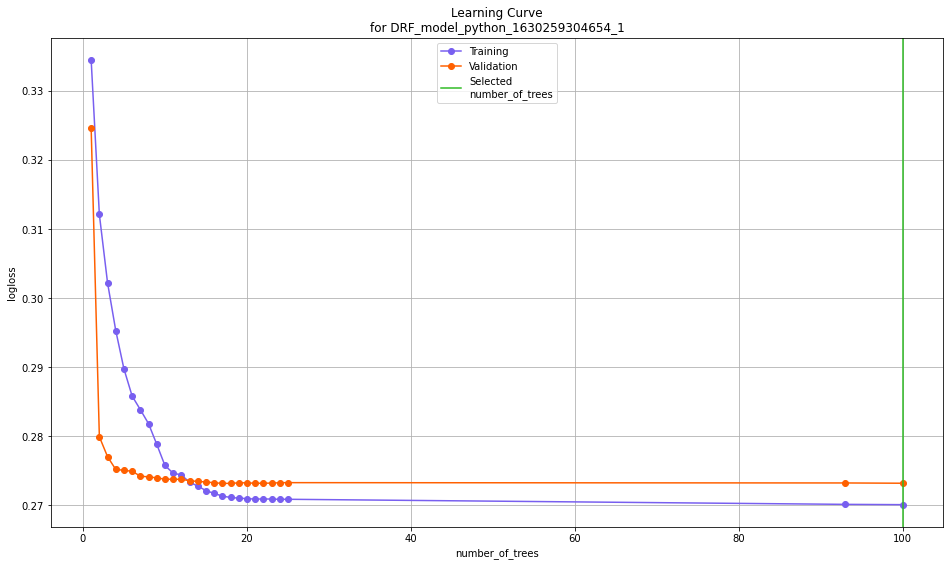

In [33]:
# if we don't save the output to the variable, the plot shows up twice
lc = drf.learning_curve_plot()

# Variable importances

In [34]:
drf.varimp()

[('AMT_GOODS_PRICE', 7112.1806640625, 1.0, 0.18848150615576376),
 ('AMT_CREDIT', 6590.7451171875, 0.9266841533554134, 0.17466282495510707),
 ('AMT_ANNUITY', 6067.685546875, 0.8531399627592023, 0.16080110514252666),
 ('NAME_EDUCATION_TYPE',
  4846.962890625,
  0.6815016546354715,
  0.1284504583133388),
 ('CODE_GENDER', 4188.3564453125, 0.588899051239806, 0.11099658015137893),
 ('AMT_INCOME_TOTAL',
  2752.454833984375,
  0.3870057530867283,
  0.07294342723273216),
 ('CNT_CHILDREN', 2192.70361328125, 0.30830257509639397, 0.05810933370586879),
 ('FLAG_OWN_CAR', 2114.276123046875, 0.29727536783903824, 0.05603090907331062),
 ('NAME_CONTRACT_TYPE',
  1233.4200439453125,
  0.17342360974851545,
  0.032687143168369584),
 ('FLAG_OWN_REALTY',
  635.3182373046875,
  0.08932819163536149,
  0.01683671210160363)]

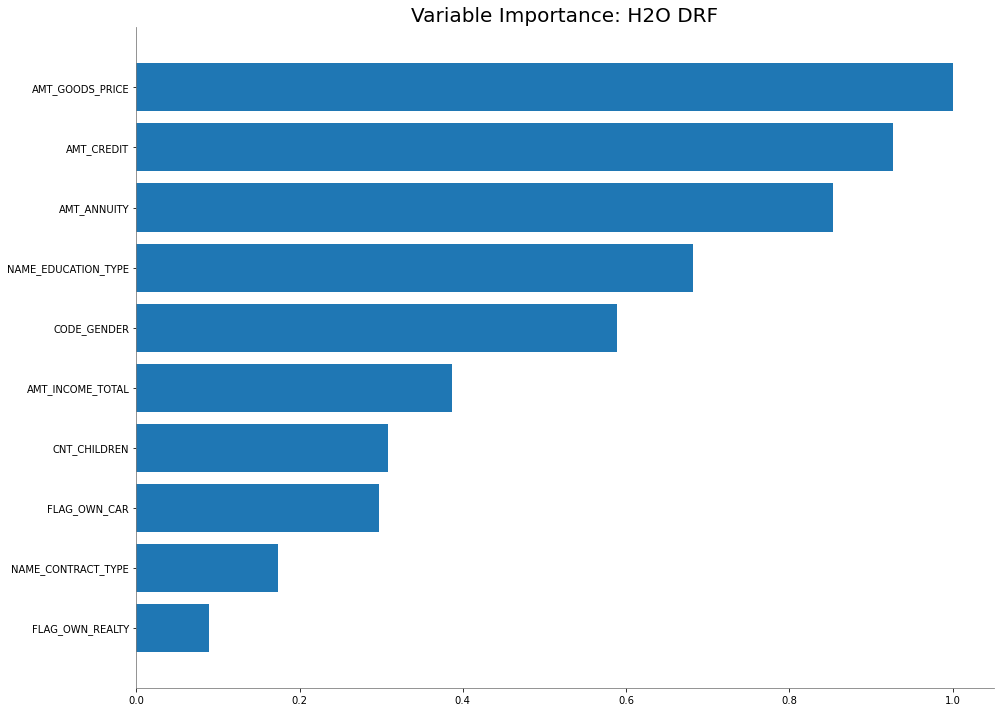

In [35]:
f = plt.figure(figsize=(5.5, 5.5))
drf.varimp_plot(server=True)
plt.tight_layout()

## sklearn feature importances

C:\Users\words\anaconda3\envs\datasci\lib\site-packages\yellowbrick\base.py:246: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


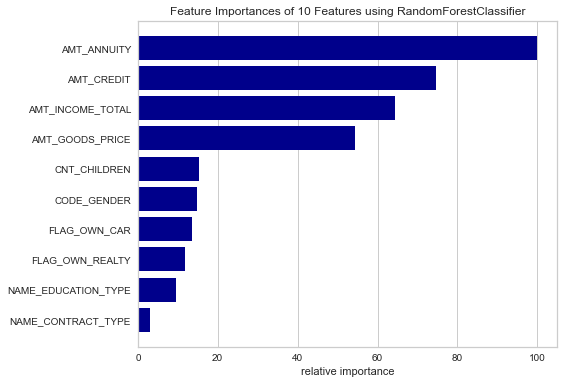

In [36]:
from yellowbrick.model_selection import feature_importances

_ = feature_importances(gs.best_estimator_, x_train, y_train, colors=['darkblue'] * features.shape[0])
plt.tight_layout()

# Boosting

## AdaBoost

In [37]:
from sklearn.ensemble import AdaBoostClassifier

adaboost = AdaBoostClassifier(n_estimators=100, learning_rate=0.5, random_state=42)
adaboost.fit(x_train, y_train)
print(adaboost.score(x_train, y_train))
print(adaboost.score(x_test, y_test))

0.9192620176032499
0.9192630688106244


In [38]:
from pycaret.classification import setup, create_model, tune_model

# only use use_gpu=True if you have a GPU that can be used for fitting the models
classification = setup(data=numeric_df, target='TARGET')#, use_gpu=True)

,Description,Value
0,session_id,741
1,Target,TARGET
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(307217, 11)"
5,Missing Values,False
6,Numeric Features,4
7,Categorical Features,6
8,Ordinal Features,False
9,High Cardinality Features,False


In [39]:
adaboost = create_model('ada', fold=3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9193,0.6342,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.9193,0.6374,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.9193,0.6368,0.0000,0.0000,0.0000,0.0000,0.0000
Mean,0.9193,0.6361,0.0000,0.0000,0.0000,0.0000,0.0000
SD,0.0000,0.0014,0.0000,0.0000,0.0000,0.0000,0.0000


In [40]:
tuned_adaboost, gridsearch = tune_model(adaboost, fold=3, return_tuner=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9193,0.6349,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.9193,0.6372,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.9193,0.6366,0.0000,0.0000,0.0000,0.0000,0.0000
Mean,0.9193,0.6362,0.0000,0.0000,0.0000,0.0000,0.0000
SD,0.0000,0.0009,0.0000,0.0000,0.0000,0.0000,0.0000


In [41]:
tuned_adaboost.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': None,
 'learning_rate': 0.3,
 'n_estimators': 190,
 'random_state': 741}

In [42]:
gridsearch.cv_results_['mean_test_score']

array([0.91931216, 0.91931216, 0.91931216, 0.91931216, 0.91931216,
       0.91931216, 0.91931216, 0.91931216, 0.91931216, 0.91931216])

## XGBoost

### PyCaret

In [43]:
xgb = create_model('xgboost', fold=3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9193,0.6479,0.0003,0.5000,0.0007,0.0006,0.0115
1,0.9193,0.6467,0.0003,0.2857,0.0007,0.0005,0.0074
2,0.9193,0.6552,0.0003,0.4000,0.0007,0.0006,0.0098
Mean,0.9193,0.6499,0.0003,0.3952,0.0007,0.0005,0.0096
SD,0.0000,0.0038,0.0000,0.0875,0.0000,0.0000,0.0017


In [44]:
best_xgb, tuner = tune_model(xgb, fold=3, search_library='scikit-optimize', return_tuner=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9193,0.6333,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.9193,0.6328,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.9193,0.6362,0.0000,0.0000,0.0000,0.0000,0.0000
Mean,0.9193,0.6341,0.0000,0.0000,0.0000,0.0000,0.0000
SD,0.0000,0.0015,0.0000,0.0000,0.0000,0.0000,0.0000


In [45]:
best_xgb.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': True,
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 0.7095639277904704,
 'gamma': 0,
 'gpu_id': -1,
 'importance_type': 'gain',
 'interaction_constraints': '',
 'learning_rate': 0.03267198004129512,
 'max_delta_step': 0,
 'max_depth': 4,
 'min_child_weight': 3,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 61,
 'n_jobs': -1,
 'num_parallel_tree': 1,
 'random_state': 741,
 'reg_alpha': 6.025340425517911e-07,
 'reg_lambda': 8.251923582557305,
 'scale_pos_weight': 2.548308200588563,
 'subsample': 0.7390331014697991,
 'tree_method': 'auto',
 'validate_parameters': 1,
 'verbosity': 0}

In [46]:
tuner.cv_results_['mean_test_score']

[0.0909458686544122,
 0.10796973741112573,
 0.6612803474524648,
 0.09636318826696923,
 0.08744437366020154,
 0.11307085296046054,
 0.5066193600587767,
 0.18437021915731616,
 0.9193121631612966,
 0.9193121631612966]

In [47]:
type(best_xgb)

xgboost.sklearn.XGBClassifier

In [48]:
best_xgb.get_booster().get_score(importance_type='gain')

{'NAME_EDUCATION_TYPE_2': 192.4914427254902,
 'AMT_CREDIT': 76.46576476189603,
 'CNT_CHILDREN_3': 2.5831502266666666,
 'NAME_CONTRACT_TYPE_1': 49.616236510396824,
 'CODE_GENDER_1.0': 264.5224720945455,
 'AMT_GOODS_PRICE': 91.57670381346912,
 'NAME_EDUCATION_TYPE_0': 113.32178211212123,
 'AMT_ANNUITY': 72.60134614609423,
 'FLAG_OWN_CAR_1': 101.05385854653058,
 'CNT_CHILDREN_0': 105.89526928636361,
 'NAME_EDUCATION_TYPE_1': 22.34227295,
 'AMT_INCOME_TOTAL': 19.255303975474323,
 'CNT_CHILDREN_1': 31.149121100000002,
 'CNT_CHILDREN_2': 9.954816812375002,
 'FLAG_OWN_REALTY_1': 16.789754246666664}

In [49]:
best_xgb.feature_importances_

array([0.01646288, 0.06537663, 0.06207263, 0.07829617, 0.04242085,
       0.22616117, 0.08639893, 0.01435489, 0.09053824, 0.02663185,
       0.        , 0.        , 0.        , 0.        , 0.00851116,
       0.00220854, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.09688775, 0.01910218, 0.16457616],
      dtype=float32)

#### xgboost with CPU

In [50]:
%%time
xgboost_gpu = create_model('xgboost', fold=3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9193,0.6479,0.0003,0.5000,0.0007,0.0006,0.0115
1,0.9193,0.6467,0.0003,0.2857,0.0007,0.0005,0.0074
2,0.9193,0.6552,0.0003,0.4000,0.0007,0.0006,0.0098
Mean,0.9193,0.6499,0.0003,0.3952,0.0007,0.0005,0.0096
SD,0.0000,0.0038,0.0000,0.0875,0.0000,0.0000,0.0017


Wall time: 11.8 s


#### xgboost with GPU

In [51]:
%%time
xgboost_gpu = create_model('xgboost', fold=3, tree_method='gpu_hist', gpu_id=0)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9192,0.6462,0.0002,0.1111,0.0003,0.0001,0.0013
1,0.9192,0.6466,0.0000,0.0000,0.0000,-0.0001,-0.0025
2,0.9193,0.6505,0.0009,0.4545,0.0017,0.0014,0.0170
Mean,0.9193,0.6478,0.0003,0.1886,0.0007,0.0005,0.0053
SD,0.0000,0.0019,0.0004,0.1935,0.0007,0.0007,0.0084


Wall time: 7.15 s


### xgboost

In [52]:
import xgboost as xgb

In [53]:
dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)

In [54]:
xgb_model = xgb.train(params={'objective': 'binary:logistic'}, dtrain=dtrain)

In [55]:
from sklearn.metrics import accuracy_score

train_preds = xgb_model.predict(dtrain)
test_preds = xgb_model.predict(dtest)

print(accuracy_score(y_train, train_preds>0.5))
print(accuracy_score(y_test, test_preds>0.5))

0.9192620176032499
0.9192630688106244


In [56]:
import json

json.loads(xgb_model.save_config())['learner']['gradient_booster']['updater']['grow_colmaker']['train_param']

{'alpha': '0',
 'cache_opt': '1',
 'colsample_bylevel': '1',
 'colsample_bynode': '1',
 'colsample_bytree': '1',
 'default_direction': 'learn',
 'enable_feature_grouping': '0',
 'eta': '0.300000012',
 'gamma': '0',
 'grow_policy': 'depthwise',
 'interaction_constraints': '',
 'lambda': '1',
 'learning_rate': '0.300000012',
 'max_bin': '256',
 'max_conflict_rate': '0',
 'max_delta_step': '0',
 'max_depth': '6',
 'max_leaves': '0',
 'max_search_group': '100',
 'min_child_weight': '1',
 'min_split_loss': '0',
 'monotone_constraints': '()',
 'refresh_leaf': '1',
 'reg_alpha': '0',
 'reg_lambda': '1',
 'sampling_method': 'uniform',
 'sketch_eps': '0.0299999993',
 'sketch_ratio': '2',
 'sparse_threshold': '0.20000000000000001',
 'split_evaluator': 'elastic_net,monotonic',
 'subsample': '1'}

### xgboost - sklearn API

In [57]:
xgb_model = xgb.XGBClassifier()

In [58]:
fit_model = xgb_model.fit(x_train, y_train)

In [59]:
fit_model.score(x_train, y_train)

0.9193965592069857

In [60]:
fit_model.score(x_test, y_test)

0.9192760887963023

## LightGBM

### PyCaret

In [61]:
light_gbm = create_model('lightgbm', fold=3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9193,0.6504,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.9193,0.6511,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.9193,0.6563,0.0000,0.0000,0.0000,-0.0000,-0.0011
Mean,0.9193,0.6526,0.0000,0.0000,0.0000,-0.0000,-0.0004
SD,0.0000,0.0026,0.0000,0.0000,0.0000,0.0000,0.0005


In [62]:
best_lgbm, tuner = tune_model(light_gbm, fold=3, search_library='scikit-optimize', return_tuner=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9193,0.6486,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.9193,0.6479,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.9193,0.6503,0.0000,0.0000,0.0000,0.0000,0.0000
Mean,0.9193,0.6489,0.0000,0.0000,0.0000,0.0000,0.0000
SD,0.0000,0.0010,0.0000,0.0000,0.0000,0.0000,0.0000


<Figure size 396x396 with 0 Axes>

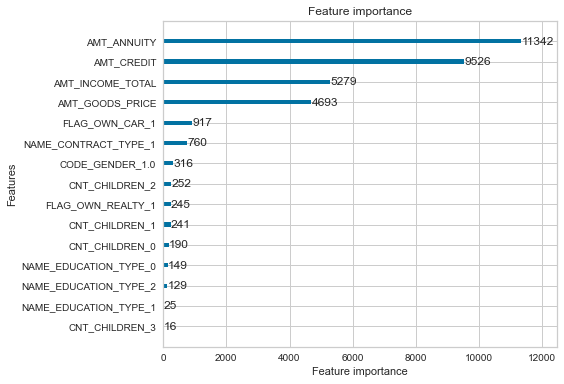

In [63]:
import lightgbm

f = plt.figure(figsize=(5.5, 5.5))
lightgbm.plot_importance(best_lgbm)
plt.tight_layout()

In [64]:
best_lgbm.feature_importances_

array([ 5279,  9526, 11342,  4693,   760,   316,   917,   245,   190,
         241,     0,     0,     0,     0,   252,    16,     0,     0,
           0,     0,     0,     0,   149,    25,   129])

### lightgbm

In [65]:
lgb_model = lightgbm.LGBMClassifier()

In [66]:
trained_lgb = lgb_model.fit(x_train, y_train)

In [67]:
trained_lgb.score(x_train, y_train)

0.9192663576549832

In [68]:
trained_lgb.predict(x_train)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

## CatBoost

### PyCaret

In [69]:
catboost_model = create_model('catboost', fold=3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9192,0.6510,0.0003,0.1538,0.0007,0.0003,0.0036
1,0.9192,0.6508,0.0000,0.0000,0.0000,-0.0002,-0.0031
2,0.9193,0.6580,0.0009,0.5556,0.0017,0.0015,0.0195
Mean,0.9192,0.6533,0.0004,0.2365,0.0008,0.0005,0.0067
SD,0.0001,0.0033,0.0004,0.2342,0.0007,0.0007,0.0095


In [70]:
best_cb, tuner = tune_model(catboost_model, fold=3, search_library='scikit-optimize', return_tuner=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9193,0.6156,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.9193,0.6106,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.9193,0.6158,0.0000,0.0000,0.0000,0.0000,0.0000
Mean,0.9193,0.6140,0.0000,0.0000,0.0000,0.0000,0.0000
SD,0.0000,0.0024,0.0000,0.0000,0.0000,0.0000,0.0000


### catboost

In [71]:
from catboost import CatBoostClassifier, Pool

In [72]:
catboost_train_data = Pool(x_train, 
                           y_train)

cb_model = CatBoostClassifier()

In [73]:
cb_model.fit(catboost_train_data, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.105129
0:	learn: 0.5930407	total: 36.5ms	remaining: 36.5s
1:	learn: 0.5159530	total: 58.3ms	remaining: 29.1s
2:	learn: 0.4579808	total: 80.8ms	remaining: 26.9s
3:	learn: 0.4145457	total: 103ms	remaining: 25.7s
4:	learn: 0.3821635	total: 126ms	remaining: 25.1s
5:	learn: 0.3574347	total: 147ms	remaining: 24.4s
6:	learn: 0.3388101	total: 169ms	remaining: 23.9s
7:	learn: 0.3242486	total: 194ms	remaining: 24s
8:	learn: 0.3130374	total: 215ms	remaining: 23.6s
9:	learn: 0.3044398	total: 235ms	remaining: 23.3s
10:	learn: 0.2977244	total: 257ms	remaining: 23.1s
11:	learn: 0.2928861	total: 272ms	remaining: 22.4s
12:	learn: 0.2890777	total: 294ms	remaining: 22.3s
13:	learn: 0.2854816	total: 315ms	remaining: 22.2s
14:	learn: 0.2830461	total: 335ms	remaining: 22s
15:	learn: 0.2807844	total: 357ms	remaining: 22s
16:	learn: 0.2791721	total: 378ms	remaining: 21.9s
17:	learn: 0.2777684	total: 400ms	remaining: 21.8s
18:	learn: 0.2767397	total: 419ms	remaining: 21.6s
19:	learn: 0.2

160:	learn: 0.2657916	total: 3.44s	remaining: 17.9s
161:	learn: 0.2657875	total: 3.46s	remaining: 17.9s
162:	learn: 0.2657612	total: 3.48s	remaining: 17.9s
163:	learn: 0.2657399	total: 3.5s	remaining: 17.8s
164:	learn: 0.2657056	total: 3.52s	remaining: 17.8s
165:	learn: 0.2656796	total: 3.54s	remaining: 17.8s
166:	learn: 0.2656506	total: 3.56s	remaining: 17.8s
167:	learn: 0.2656268	total: 3.58s	remaining: 17.7s
168:	learn: 0.2655905	total: 3.6s	remaining: 17.7s
169:	learn: 0.2655768	total: 3.62s	remaining: 17.7s
170:	learn: 0.2655198	total: 3.64s	remaining: 17.6s
171:	learn: 0.2654983	total: 3.66s	remaining: 17.6s
172:	learn: 0.2654573	total: 3.68s	remaining: 17.6s
173:	learn: 0.2654363	total: 3.7s	remaining: 17.6s
174:	learn: 0.2654192	total: 3.72s	remaining: 17.5s
175:	learn: 0.2653927	total: 3.73s	remaining: 17.5s
176:	learn: 0.2653751	total: 3.75s	remaining: 17.5s
177:	learn: 0.2653584	total: 3.77s	remaining: 17.4s
178:	learn: 0.2653422	total: 3.79s	remaining: 17.4s
179:	learn: 0.2

319:	learn: 0.2625115	total: 6.71s	remaining: 14.3s
320:	learn: 0.2624961	total: 6.73s	remaining: 14.2s
321:	learn: 0.2624811	total: 6.75s	remaining: 14.2s
322:	learn: 0.2624682	total: 6.77s	remaining: 14.2s
323:	learn: 0.2624489	total: 6.79s	remaining: 14.2s
324:	learn: 0.2624263	total: 6.82s	remaining: 14.2s
325:	learn: 0.2624043	total: 6.84s	remaining: 14.1s
326:	learn: 0.2623944	total: 6.87s	remaining: 14.1s
327:	learn: 0.2623838	total: 6.89s	remaining: 14.1s
328:	learn: 0.2623640	total: 6.92s	remaining: 14.1s
329:	learn: 0.2623398	total: 6.94s	remaining: 14.1s
330:	learn: 0.2623306	total: 6.96s	remaining: 14.1s
331:	learn: 0.2623131	total: 6.98s	remaining: 14s
332:	learn: 0.2622945	total: 7s	remaining: 14s
333:	learn: 0.2622780	total: 7.02s	remaining: 14s
334:	learn: 0.2622461	total: 7.04s	remaining: 14s
335:	learn: 0.2622325	total: 7.06s	remaining: 13.9s
336:	learn: 0.2622168	total: 7.08s	remaining: 13.9s
337:	learn: 0.2622012	total: 7.1s	remaining: 13.9s
338:	learn: 0.2621888	to

478:	learn: 0.2599844	total: 9.98s	remaining: 10.9s
479:	learn: 0.2599713	total: 10s	remaining: 10.8s
480:	learn: 0.2599525	total: 10s	remaining: 10.8s
481:	learn: 0.2599420	total: 10s	remaining: 10.8s
482:	learn: 0.2599336	total: 10.1s	remaining: 10.8s
483:	learn: 0.2599162	total: 10.1s	remaining: 10.7s
484:	learn: 0.2599044	total: 10.1s	remaining: 10.7s
485:	learn: 0.2598893	total: 10.1s	remaining: 10.7s
486:	learn: 0.2598818	total: 10.1s	remaining: 10.7s
487:	learn: 0.2598699	total: 10.2s	remaining: 10.7s
488:	learn: 0.2598537	total: 10.2s	remaining: 10.6s
489:	learn: 0.2598409	total: 10.2s	remaining: 10.6s
490:	learn: 0.2598311	total: 10.2s	remaining: 10.6s
491:	learn: 0.2598171	total: 10.2s	remaining: 10.6s
492:	learn: 0.2597973	total: 10.3s	remaining: 10.5s
493:	learn: 0.2597813	total: 10.3s	remaining: 10.5s
494:	learn: 0.2597773	total: 10.3s	remaining: 10.5s
495:	learn: 0.2597574	total: 10.3s	remaining: 10.5s
496:	learn: 0.2597474	total: 10.3s	remaining: 10.5s
497:	learn: 0.2597

637:	learn: 0.2575962	total: 13.2s	remaining: 7.51s
638:	learn: 0.2575878	total: 13.3s	remaining: 7.49s
639:	learn: 0.2575548	total: 13.3s	remaining: 7.47s
640:	learn: 0.2575409	total: 13.3s	remaining: 7.45s
641:	learn: 0.2575233	total: 13.3s	remaining: 7.43s
642:	learn: 0.2575115	total: 13.3s	remaining: 7.41s
643:	learn: 0.2575040	total: 13.4s	remaining: 7.39s
644:	learn: 0.2574923	total: 13.4s	remaining: 7.37s
645:	learn: 0.2574835	total: 13.4s	remaining: 7.34s
646:	learn: 0.2574644	total: 13.4s	remaining: 7.32s
647:	learn: 0.2574532	total: 13.4s	remaining: 7.3s
648:	learn: 0.2574499	total: 13.5s	remaining: 7.28s
649:	learn: 0.2574319	total: 13.5s	remaining: 7.26s
650:	learn: 0.2574206	total: 13.5s	remaining: 7.24s
651:	learn: 0.2574031	total: 13.5s	remaining: 7.22s
652:	learn: 0.2573922	total: 13.5s	remaining: 7.2s
653:	learn: 0.2573841	total: 13.6s	remaining: 7.17s
654:	learn: 0.2573726	total: 13.6s	remaining: 7.15s
655:	learn: 0.2573565	total: 13.6s	remaining: 7.13s
656:	learn: 0.

796:	learn: 0.2554626	total: 16.5s	remaining: 4.21s
797:	learn: 0.2554401	total: 16.6s	remaining: 4.19s
798:	learn: 0.2554248	total: 16.6s	remaining: 4.17s
799:	learn: 0.2554126	total: 16.6s	remaining: 4.15s
800:	learn: 0.2554007	total: 16.6s	remaining: 4.13s
801:	learn: 0.2553919	total: 16.6s	remaining: 4.11s
802:	learn: 0.2553803	total: 16.7s	remaining: 4.09s
803:	learn: 0.2553707	total: 16.7s	remaining: 4.07s
804:	learn: 0.2553459	total: 16.7s	remaining: 4.04s
805:	learn: 0.2553382	total: 16.7s	remaining: 4.02s
806:	learn: 0.2553229	total: 16.7s	remaining: 4s
807:	learn: 0.2553091	total: 16.8s	remaining: 3.98s
808:	learn: 0.2553081	total: 16.8s	remaining: 3.96s
809:	learn: 0.2553028	total: 16.8s	remaining: 3.94s
810:	learn: 0.2552974	total: 16.8s	remaining: 3.92s
811:	learn: 0.2552794	total: 16.8s	remaining: 3.9s
812:	learn: 0.2552671	total: 16.9s	remaining: 3.88s
813:	learn: 0.2552599	total: 16.9s	remaining: 3.86s
814:	learn: 0.2552446	total: 16.9s	remaining: 3.84s
815:	learn: 0.25

955:	learn: 0.2535407	total: 19.8s	remaining: 912ms
956:	learn: 0.2535295	total: 19.8s	remaining: 891ms
957:	learn: 0.2535115	total: 19.9s	remaining: 870ms
958:	learn: 0.2534925	total: 19.9s	remaining: 849ms
959:	learn: 0.2534804	total: 19.9s	remaining: 829ms
960:	learn: 0.2534617	total: 19.9s	remaining: 809ms
961:	learn: 0.2534442	total: 20s	remaining: 788ms
962:	learn: 0.2534299	total: 20s	remaining: 767ms
963:	learn: 0.2534158	total: 20s	remaining: 747ms
964:	learn: 0.2534081	total: 20s	remaining: 726ms
965:	learn: 0.2533961	total: 20s	remaining: 705ms
966:	learn: 0.2533817	total: 20.1s	remaining: 684ms
967:	learn: 0.2533739	total: 20.1s	remaining: 664ms
968:	learn: 0.2533677	total: 20.1s	remaining: 643ms
969:	learn: 0.2533527	total: 20.1s	remaining: 622ms
970:	learn: 0.2533310	total: 20.1s	remaining: 601ms
971:	learn: 0.2533130	total: 20.2s	remaining: 581ms
972:	learn: 0.2533030	total: 20.2s	remaining: 560ms
973:	learn: 0.2532839	total: 20.2s	remaining: 539ms
974:	learn: 0.2532775	

In [74]:
cb_model.score(catboost_train_data)

0.9197307431904588

In [75]:
catboost_test_data = Pool(x_test)

In [76]:
cb_model.predict(catboost_test_data)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

#### Early stopping

In [77]:
import catboost

new_cb = catboost.CatBoostClassifier(**best_cb.get_params())
new_cb.set_params(n_estimators=1000)

In [78]:
catboost.__version__

'0.26.1'

In [79]:
new_cb.fit(X=x_train, y=y_train, eval_set=(x_test, y_test), early_stopping_rounds=10, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [80]:
new_cb.get_params()

{'depth': 8,
 'l2_leaf_reg': 134,
 'border_count': 254,
 'verbose': False,
 'random_strength': 0.5866069662724502,
 'task_type': 'CPU',
 'n_estimators': 1000,
 'random_state': 741,
 'eta': 3.1436874666192056e-05}

In [81]:
new_cb.tree_count_

1000